<a href="https://colab.research.google.com/github/friedelj/AAI-510-TEAM-03/blob/main/JFriedel_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1- Neural Network**

In [11]:
import numpy as np
import cv2
import glob
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models  # Import layers and models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

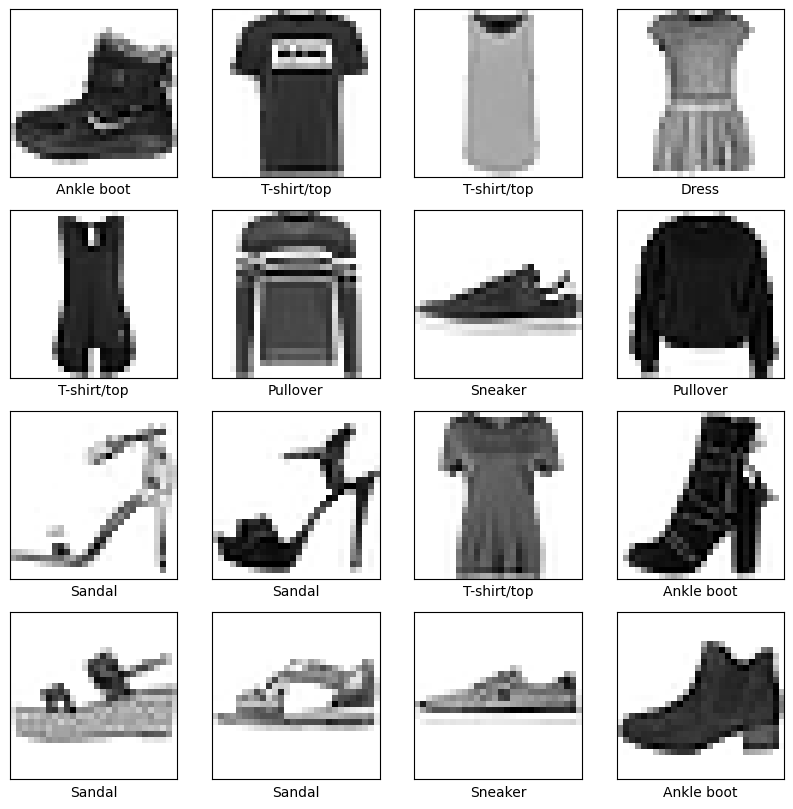

In [4]:
# Read the Fashion-MNIST dataset into Python
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Draw the first 16 data (images) from the training data while showing the name of each image (label of it) under the image
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [6]:
# Normalize the data (both train and test)
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#Create the NN model here
#    one hidden layer
#    128 nodes
#    Relu activation function
#    Softmax output activation function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Train the model here
#     20% for validation
#     20 epochs
#     batch sizes are 128
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7325 - loss: 0.7946 - val_accuracy: 0.8420 - val_loss: 0.4437
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8469 - loss: 0.4312 - val_accuracy: 0.8612 - val_loss: 0.3958
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.3847 - val_accuracy: 0.8652 - val_loss: 0.3936
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8719 - loss: 0.3581 - val_accuracy: 0.8696 - val_loss: 0.3762
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.3308 - val_accuracy: 0.8716 - val_loss: 0.3677
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.3149 - val_accuracy: 0.8775 - val_loss: 0.3456
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.3050 - val_accuracy: 0.8829 - val_loss: 0.3325
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2890 - val_accuracy: 0.

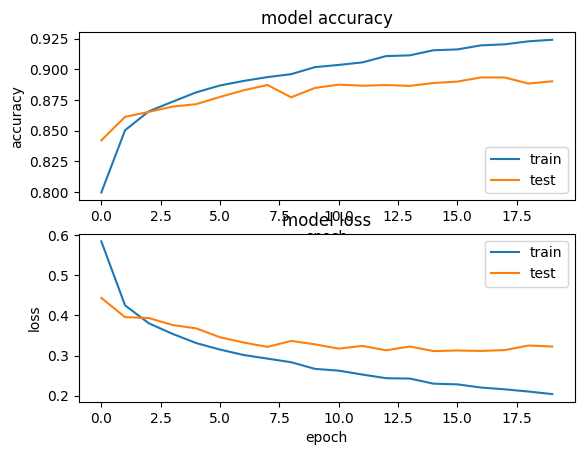

In [9]:
# Draw the learning curves
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

Write your understanding about this model here:
The results are fair with the accuracy dropping from 0.92 to 0.88, comparing
training and test data.  Similarly the error increases from 0.2 to 0.3 when
comparing training and testing results.  The model appears to be overtrained.


What is your suggestion to resolve the issue that you see?
I would increase the input data but multiplying and skewering (distorting) the
original input data.

**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [22]:
# transferring the data to our VM on Colab
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

*a) How many images we can find in this dataset?*  3670




In [16]:
# counting the total number of images in this dataset.
image_count = len(list(data_dir.glob('*/*.jpg')))  # Counts all files with a .jpg extension in subdirectories
print(image_count)

3670


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


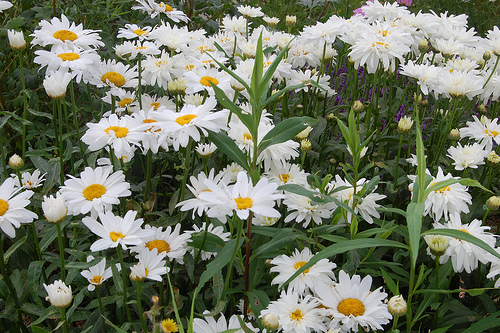

In [19]:
# use Pillow (PIL) to show at least one flower from each subfolder

# Define the path to the daisy subfolder
daisy_dir = os.path.join(data_dir, 'daisy')

# Populate the daisy list with all image paths in the daisy subfolder
daisy = [os.path.join(daisy_dir, img) for img in os.listdir(daisy_dir) if img.endswith('.jpg')]

PIL.Image.open(str(daisy[2]))              # Use Pillow here to plot the image

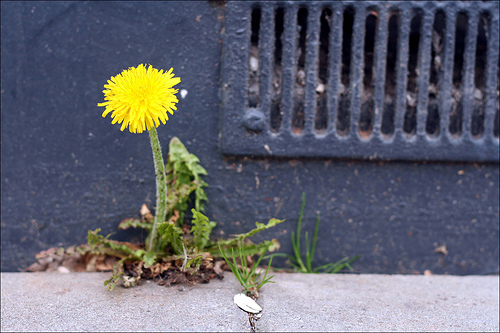

In [20]:
# Define the path to the dandelion subfolder
dandelion_dir = os.path.join(data_dir, 'dandelion')

# Populate the dandelion list with all image paths in the dandelion subfolder
dandelion = [os.path.join(dandelion_dir, img) for img in os.listdir(dandelion_dir) if img.endswith('.jpg')]

PIL.Image.open(str(dandelion[2]))              # Use Pillow here to plot the image

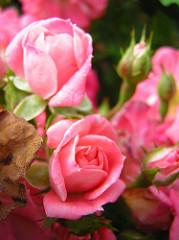

In [21]:
# Define the path to the roses subfolder
roses_dir = os.path.join(data_dir, 'roses')

# Populate the roses list with all image paths in the roses subfolder
roses = [os.path.join(roses_dir, img) for img in os.listdir(roses_dir) if img.endswith('.jpg')]

PIL.Image.open(str(roses[2]))              # Use Pillow here to plot the image

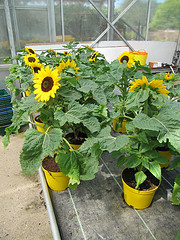

In [22]:
# Define the path to the sunflowers subfolder
sunflowers_dir = os.path.join(data_dir, 'sunflowers')

# Populate the sunflowers list with all image paths in the sunflowers subfolder
sunflowers = [os.path.join(sunflowers_dir, img) for img in os.listdir(sunflowers_dir) if img.endswith('.jpg')]

PIL.Image.open(str(sunflowers[2]))              # Use Pillow here to plot the image

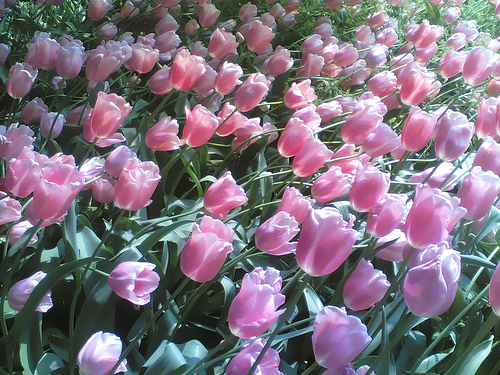

In [23]:
# Define the path to the tulips subfolder
tulips_dir = os.path.join(data_dir, 'tulips')

# Populate the tulips list with all image paths in the tulips subfolder
tulips = [os.path.join(tulips_dir, img) for img in os.listdir(tulips_dir) if img.endswith('.jpg')]

PIL.Image.open(str(tulips[2]))              # Use Pillow here to plot the image

*c) Use Keras to resize all the images into same dimension 180x180*

In [2]:
# use Keras to load the data and apply preprocessing techniques
batch_size = 32
img_height = 180
img_width = 180
image_size=(img_height, img_width)
batch_size=32

In [7]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Load the dataset and resize images to 180x180
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),  # Resize all images to 180x180
    batch_size=32,          # You can set the batch size as needed
    label_mode='int'        # Labels will be assigned as integers for each folder
)

# Preview the first batch of images to verify the size
for images, labels in dataset.take(1):
    print("Batch of images shape:", images.shape)  # Should output (batch_size, 180, 180, 3)
    print("Batch of labels shape:", labels.shape)

Found 3670 files belonging to 5 classes.
Batch of images shape: (32, 180, 180, 3)
Batch of labels shape: (32,)


In [8]:
# create training data
# Load the dataset, resizing images to 180x180
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2,  # 80% training, 20% validation
    subset="training",
    seed=42  # Ensures reproducibility in the split
)
# Note the message that you receive from Python identifying the number of classes:

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


Found 3670 files belonging to 5 classes.
Using 2936 files for training.

In [9]:
# create validation data from validation subset
# convert the validation data into 180 x 180
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(180, 180),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
# Optimize dataset loading
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Normalize the pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for the flowers
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Set the number of epochs as needed
)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.3579 - loss: 1.5068 - val_accuracy: 0.5749 - val_loss: 1.0529
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6134 - loss: 0.9777 - val_accuracy: 0.6526 - val_loss: 0.9203
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6766 - loss: 0.8057 - val_accuracy: 0.6499 - val_loss: 0.9468
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7679 - loss: 0.6137 - val_accuracy: 0.6376 - val_loss: 1.0736
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.8470 - loss: 0.4279 - val_accuracy: 0.6022 - val_loss: 1.5359
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.8680 - loss: 0.3946 - val_accuracy: 0.6226 - val_loss: 1.2896
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9110 - loss: 0.2479 - val_accuracy: 0.5640 - val_loss: 1.9684
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.9272 - loss: 0.2241 - val_accuracy: 0.5899 - v

d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

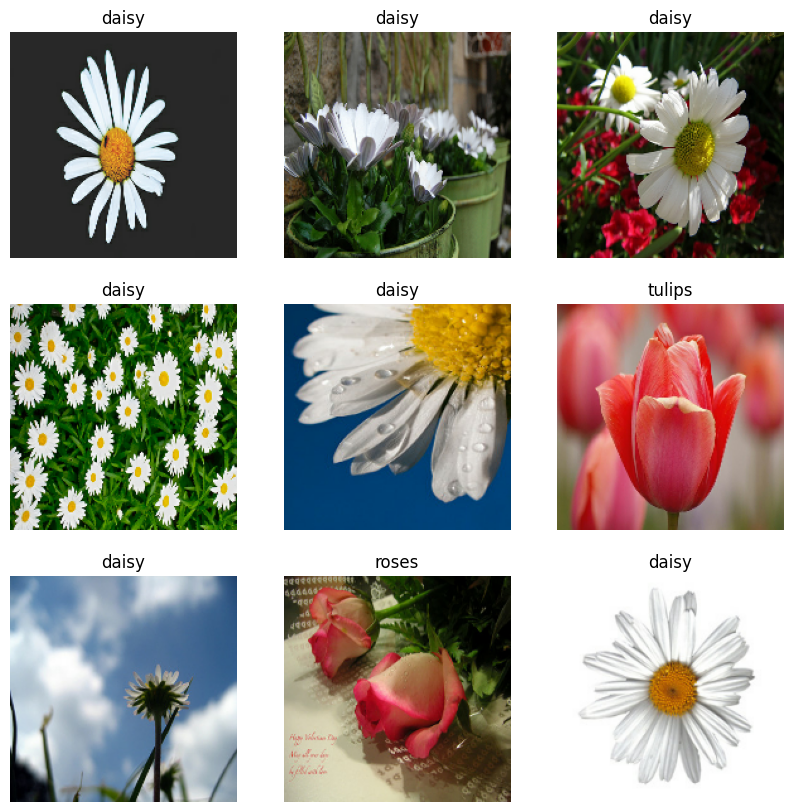

In [10]:
# randomly show 9 images from training data while printing their label on top of the image
class_names = train_ds.class_names  # Get class names from the dataset

# Get a batch of images and labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Display each image
        plt.title(class_names[labels[i]])  # Display the class name
        plt.axis("off")
    plt.show()

Please carefully review the images. What are some barriers that you can see in the images for having a proper classification?

Several obstacles to correctness, although the label in this sample appear correct.  The first picture in the bottom row is out of focus.  The middle picture in the bottom row has other objects in the picture, besides the flowers, such a script writing and a grill.  In the 3rd picture in the top row, there are two types of flowers in the photo.  In the middle picture in the top row, the flower pots seem more distinguished than the flowers in them.

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [17]:
# Set up ImageDataGenerator with rescaling, shearing, zooming, and flipping
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,       # Shear by 20%
    zoom_range=0.2,        # Zoom by 20%
    horizontal_flip=True,  # Horizontally flip
    validation_split=0.2   # Reserve 20% for validation
)

# Define path to the data directory
#data_dir = 'path/to/data_dir'  # Update this path

# Create training and validation datasets from the same directory
training_set = train_datagen.flow_from_directory(
    data_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse',   # Use sparse labels for classification
    subset="training",
    seed=42                 # Ensures reproducibility in the split
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_ds = val_datagen.flow_from_directory(
    data_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse',
    subset="validation",
    seed=42
)

# Define the model as before
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    training_set,
    validation_data=val_ds,
    epochs=10  # Set the number of epochs as needed
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.3274 - loss: 1.6550 - val_accuracy: 0.4665 - val_loss: 1.2505
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.5549 - loss: 1.0473 - val_accuracy: 0.5787 - val_loss: 1.0637
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.6366 - loss: 0.9116 - val_accuracy: 0.6498 - val_loss: 0.9514
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.6819 - loss: 0.8364 - val_accuracy: 0.6471 - val_loss: 0.9400
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.7108 - loss: 0.7801 - val_accuracy: 0.6375 - val_loss: 1.0459
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.7350 - loss: 0.7006 - val_accuracy: 0.6443 - val_loss: 0.9774
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.7408 - loss: 0.6679 - val_accuracy: 0.6895 - val_loss: 0.8713
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.7829 - loss: 0.5685 - val_accuracy: 0.6963 - val_loss: 0.

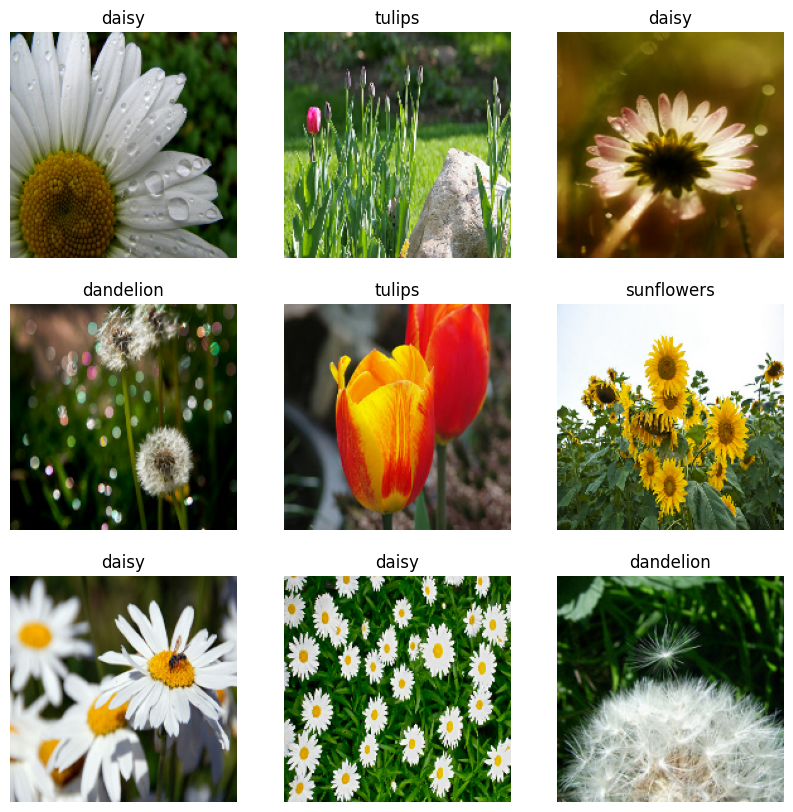

In [10]:
# randomly show 9 images from training data while printing their label on top of the image
class_names = train_ds.class_names  # Get class names from the dataset

# Get a batch of images and labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Display each image
        plt.title(class_names[labels[i]])  # Display the class name
        plt.axis("off")
    plt.show()

**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

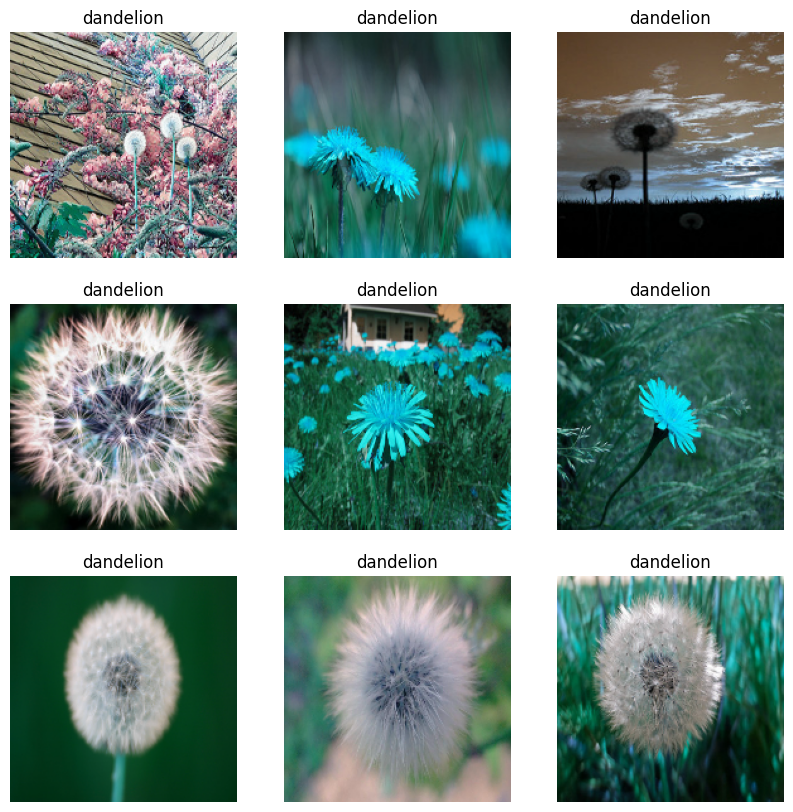

In [25]:
# Repeat same preprocessing but this time using OpenCV.
# a) Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180
# Get the list of image paths and class names
list_of_images = list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names

# Set up the figure
plt.figure(figsize=(10, 10))

for i in range(9):
    # Read the image using OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    # Resize the image to 180x180
    img_resized = cv2.resize(img, (180, 180))

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Extract the class name from the parent directory of the image file
    class_name = list_of_images[i].parent.name  # This is the folder name representing the class

    # Display the image in a 3x3 grid
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img_resized)
    plt.title(class_name)  # Display the class name as the title
    plt.axis("off")

# Show the plot
plt.show()

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

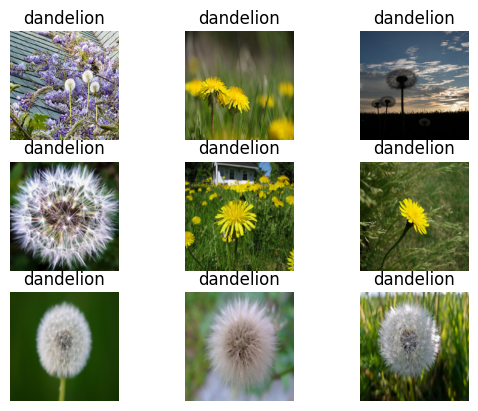

In [26]:
# b) Note that images are not in normal color. Convert images into colorful ones with normal coloring.
for i in range(9):
    # Read the image using OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    # Resize the image to 180x180
    img_resized = cv2.resize(img, (180, 180))

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Extract the class name from the parent directory of the image file
    class_name = list_of_images[i].parent.name  # This is the folder name representing the class

    # Display the image in a 3x3 grid
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(class_name)  # Display the class name as the title
    plt.axis("off")

# Show the plot
plt.show()